<a href="https://colab.research.google.com/github/AsmitaVikram/US_household_income_distribution/blob/main/US_household_income_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_income=pd.read_csv('/content/kaggle_income.csv',encoding='ISO-8859-1')

In [ ]:
df_income.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


array([[<Axes: title={'center': 'sum_w'}>]], dtype=object)

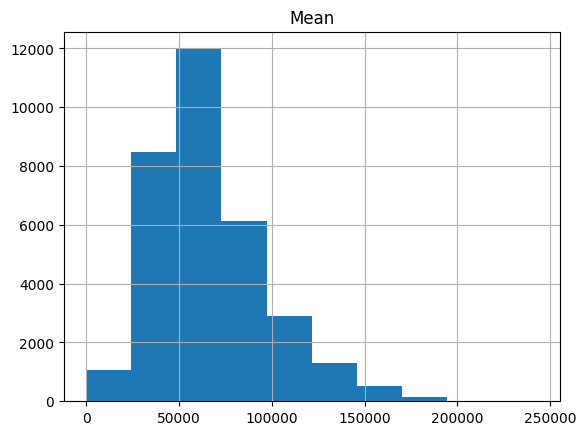

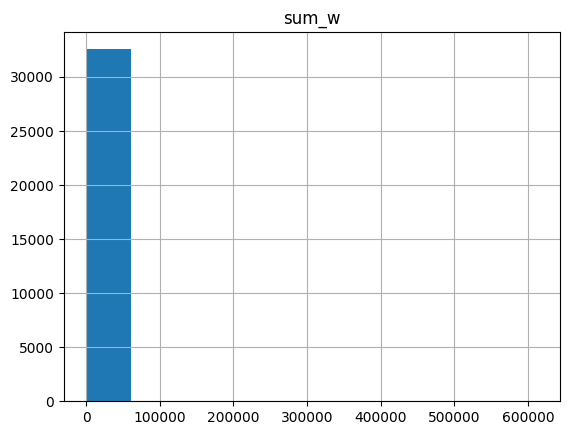

In [ ]:
df_income.hist(column='Mean')
df_income.hist(column='sum_w')

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
#converting string to NaN
df_income['Area_Code_Num'] = pd.to_numeric(df_income['Area_Code'], errors='coerce')

#converting NaN to 0
df_income['Area_Code_Num'].fillna(0,inplace=True)

#converting string to number
dummies_Type = pd.get_dummies(df_income['Type'], prefix='Type')
dummies_Primary = pd.get_dummies(df_income['Primary'], prefix='Primary')

#Add number columns
df_income_new= pd.concat([df_income,dummies_Type, dummies_Primary],axis=1)

#drop string columns
df_income_new.drop(['id','State_Name','State_ab','County','City','Place','Type','Primary','Median','Stdev','Area_Code','Mean'], axis=1, inplace=True)

#Split data into training data and cross validation data
x= df_income_new
y= df_income[['Mean']]
X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size= 0.1, random_state=3)
X_train.head(10)


,State_Code,Zip_Code,ALand,AWater,Lat,Lon,sum_w,Area_Code_Num,Type_Borough,Type_CDP,Type_City,Type_Community,Type_County,Type_Municipality,Type_Town,Type_Track,Type_Urban,Type_Village,Primary_Track,Primary_place
24107,41,97603,5376012,0,42.195721,-121.714444,1422.206867,541.0,0,0,0,0,0,0,0,1,0,0,1,0
22468,39,44052,1117351,258847,41.460555,-82.194496,402.584133,440.0,0,0,0,0,0,0,0,1,0,0,1,0
26081,45,29936,655791460,3616013,32.548390,-81.093104,552.951132,843.0,0,0,0,0,0,0,0,1,0,0,1,0
28204,48,76180,2818034,0,32.853840,-97.202665,452.910377,817.0,0,0,0,0,0,0,0,1,0,0,1,0
23382,39,43701,17825561,683652,39.998870,-81.992374,335.547967,740.0,0,0,0,0,0,0,0,1,0,0,1,0
15756,27,55378,10702693,292286,44.731093,-93.352225,158.615346,952.0,0,0,0,0,0,0,0,1,0,0,1,0
25011,42,15210,849780,0,40.384700,-79.992046,182.429223,412.0,0,0,0,0,0,0,0,1,0,0,1,0
1430,5,72201,2788581,394309,34.759842,-92.270568,199.394982,501.0,0,0,0,0,0,0,0,1,0,0,1,0
10396,18,46516,4202645,703582,41.690062,-85.949999,1621.516750,574.0,0,0,0,0,0,0,0,1,0,0,1,0
22888,39,44137,3354889,0,41.414279,-81.516590,1209.385083,216.0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
#scaling the training and test data
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
mapper= DataFrameMapper([(X_train.columns, StandardScaler())])
scaled_features= mapper.fit_transform(X_train.copy())
X_train_scaled= pd.DataFrame(scaled_features, index= X_train.index, columns= X_train.columns)
scaled_feature_test= mapper.fit_transform(X_test.copy())
X_test_scaled= pd.DataFrame(scaled_feature_test,index= X_test.index, columns=X_test.columns)
X_train_scaled.head(10)

,State_Code,Zip_Code,ALand,AWater,Lat,Lon,sum_w,Area_Code_Num,Type_Borough,Type_CDP,Type_City,Type_Community,Type_County,Type_Municipality,Type_Town,Type_Track,Type_Urban,Type_Village,Primary_Track,Primary_place
24107,0.757345,1.613557,-0.085141,-0.033341,0.794973,-1.874338,0.209558,-0.222003,-0.063075,-0.177284,-0.183939,-0.024805,-0.008266,-0.005845,-0.121955,0.324385,-0.014318,-0.112367,0.324385,-0.324385
22468,0.634587,-0.209896,-0.088329,-0.032141,0.663248,0.562432,-0.043134,-0.655974,-0.063075,-0.177284,-0.183939,-0.024805,-0.008266,-0.005845,-0.121955,0.324385,-0.014318,-0.112367,0.324385,-0.324385
26081,1.002863,-0.690557,0.401826,-0.016577,-0.933604,0.630343,-0.005869,1.075615,-0.063075,-0.177284,-0.183939,-0.024805,-0.008266,-0.005845,-0.121955,0.324385,-0.014318,-0.112367,0.324385,-0.324385
28204,1.187002,0.884087,-0.087056,-0.033341,-0.878874,-0.362960,-0.030662,0.963899,-0.063075,-0.177284,-0.183939,-0.024805,-0.008266,-0.005845,-0.121955,0.324385,-0.014318,-0.112367,0.324385,-0.324385
23382,0.634587,-0.221848,-0.075820,-0.030172,0.401348,0.574894,-0.059747,0.633050,-0.063075,-0.177284,-0.183939,-0.024805,-0.008266,-0.005845,-0.121955,0.324385,-0.014318,-0.112367,0.324385,-0.324385
15756,-0.101967,0.175763,-0.081152,-0.031986,1.249252,-0.125545,-0.103596,1.543960,-0.063075,-0.177284,-0.183939,-0.024805,-0.008266,-0.005845,-0.121955,0.324385,-0.014318,-0.112367,0.324385,-0.324385
25011,0.818725,-1.191989,-0.088529,-0.033341,0.470480,0.698233,-0.097695,-0.776283,-0.063075,-0.177284,-0.183939,-0.024805,-0.008266,-0.005845,-0.121955,0.324385,-0.014318,-0.112367,0.324385,-0.324385
1430,-1.452315,0.748599,-0.087078,-0.031513,-0.537363,-0.058851,-0.093490,-0.393873,-0.063075,-0.177284,-0.183939,-0.024805,-0.008266,-0.005845,-0.121955,0.324385,-0.014318,-0.112367,0.324385,-0.324385
10396,-0.654382,-0.125995,-0.086019,-0.030080,0.704371,0.330870,0.258953,-0.080210,-0.063075,-0.177284,-0.183939,-0.024805,-0.008266,-0.005845,-0.121955,0.324385,-0.014318,-0.112367,0.324385,-0.324385
22888,0.634587,-0.207002,-0.086654,-0.033341,0.654957,0.604231,0.156815,-1.618446,-0.063075,-0.177284,-0.183939,-0.024805,-0.008266,-0.005845,-0.121955,0.324385,-0.014318,-0.112367,0.324385,-0.324385


In [ ]:
#prediction of household mean
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
model= LinearRegression()
model.fit(X_train_scaled,Y_train)

#Model Evaluation
y_pred= model.predict(X_test_scaled)
print('Explained variance score: %.2f'% explained_variance_score(Y_test, y_pred))
print('Mean sqaured error:%.2f' % mean_squared_error(Y_test, y_pred))
print('Variance score:%.2f' % r2_score(Y_test, y_pred))

Explained variance score: 0.05
Mean sqaured error:886080289.95
Variance score:0.05
